# Notebook 15: Visualization Factory Demo

This notebook demonstrates the new visualization factory infrastructure for creating consistent, professional plots across all reports.

Key Features:
- Centralized style management with multiple themes
- Figure factory for standardized plot types
- Consistent colors, fonts, and sizing
- Easy theme switching for different report types

In [1]:
# Setup and imports
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Add parent directory to path
sys.path.append(str(Path().absolute().parent))

# Import the new visualization factory components
from src.visualization_infra.style_manager import StyleManager, Theme
from src.visualization_infra.figure_factory import FigureFactory
from src.visualization import set_wsj_style, get_figure_factory

# Set random seed for reproducibility
np.random.seed(42)

print("Visualization Factory loaded successfully!")

Visualization Factory loaded successfully!


## 1. StyleManager Demo: Theme Management

The StyleManager provides centralized control over all visual aspects of plots.

In [2]:
# Create style manager with default theme
style_mgr = StyleManager(theme=Theme.DEFAULT)

# Display available themes
print("Available Themes:")
print("="*40)
for theme in Theme:
    print(f"- {theme.value}: {theme.name}")

# Show current theme configuration
colors = style_mgr.get_colors()
fonts = style_mgr.get_fonts()
figure = style_mgr.get_figure_config()

print("\nCurrent Theme Configuration (DEFAULT):")
print("="*40)
print(f"Primary Color: {colors.primary}")
print(f"Font Family: {fonts.family}")
print(f"Base Font Size: {fonts.size_base}")
print(f"Blog Figure Size: {figure.size_blog}")
print(f"Web DPI: {figure.dpi_web}")
print(f"Print DPI: {figure.dpi_print}")

Available Themes:
- default: DEFAULT
- colorblind: COLORBLIND
- presentation: PRESENTATION
- minimal: MINIMAL
- print: PRINT

Current Theme Configuration (DEFAULT):
Primary Color: #0080C7
Font Family: Arial
Base Font Size: 11
Blog Figure Size: (8, 6)
Web DPI: 150
Print DPI: 300


## 2. FigureFactory Demo: Standardized Plots

The FigureFactory creates various plot types with automatic styling applied.

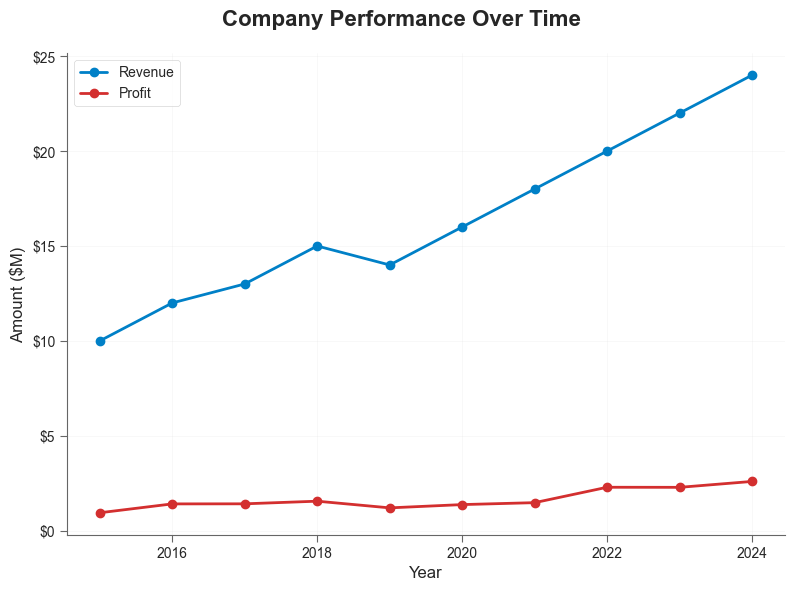

In [3]:
# Create factory with default theme
factory = FigureFactory(theme=Theme.DEFAULT)

# Generate sample data
years = np.arange(2015, 2025)
revenue = np.array([10, 12, 13, 15, 14, 16, 18, 20, 22, 24])
profit = revenue * np.random.uniform(0.08, 0.12, len(revenue))

# Create a line plot using the factory
fig, ax = factory.create_line_plot(
    x_data=years,
    y_data={'Revenue': revenue, 'Profit': profit},
    title="Company Performance Over Time",
    x_label="Year",
    y_label="Amount ($M)",
    size_type="blog",  # Use blog-optimized size
    show_legend=True,
    markers=True
)

# Apply currency formatting to y-axis
factory.format_axis_currency(ax, axis="y", abbreviate=True)

plt.show()

## 3. Theme Comparison: Same Data, Different Themes

Let's see how the same data looks with different themes.

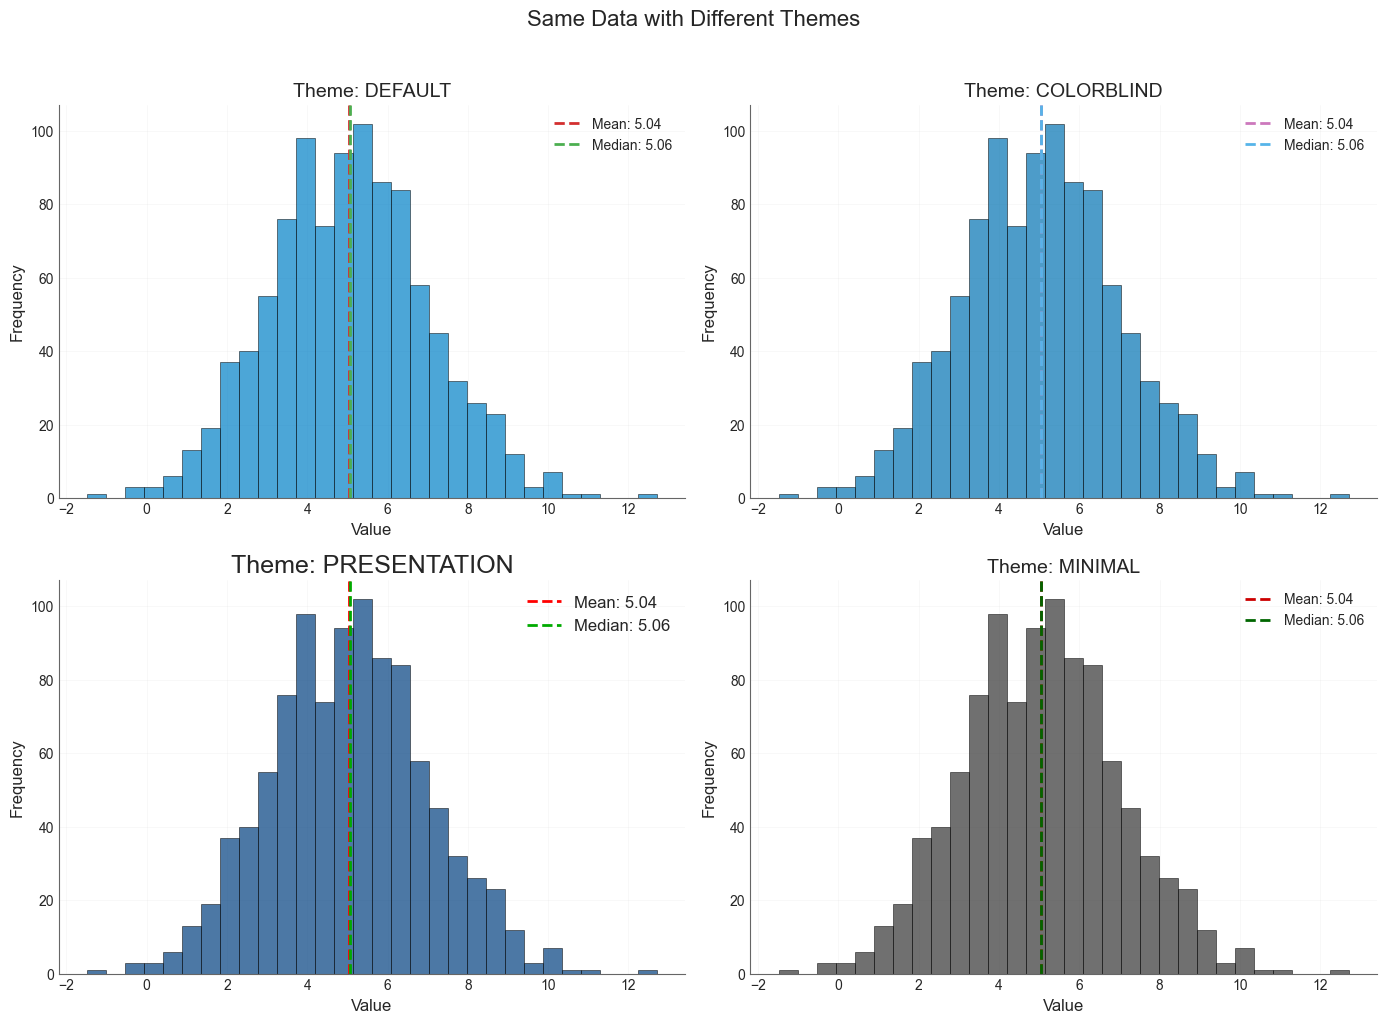

In [4]:
# Generate sample distribution data
data = np.random.randn(1000) * 2 + 5

# Create subplots for different themes
themes_to_compare = [
    Theme.DEFAULT,
    Theme.COLORBLIND,
    Theme.PRESENTATION,
    Theme.MINIMAL
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, theme in enumerate(themes_to_compare):
    # Create factory with specific theme
    theme_factory = FigureFactory(theme=theme, auto_apply=False)
    
    # Apply theme styling
    theme_factory.style_manager.apply_style()
    
    # Create histogram in the subplot
    ax = axes[idx]
    colors = theme_factory.style_manager.get_colors()
    
    n, bins, patches = ax.hist(data, bins=30, 
                               color=colors.primary, 
                               alpha=0.7, 
                               edgecolor='black',
                               linewidth=0.5)
    
    # Add mean and median lines
    mean_val = np.mean(data)
    median_val = np.median(data)
    
    ax.axvline(mean_val, color=colors.warning, 
               linestyle='--', linewidth=2, 
               label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color=colors.success, 
               linestyle='--', linewidth=2, 
               label=f'Median: {median_val:.2f}')
    
    ax.set_title(f'Theme: {theme.value.upper()}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('Same Data with Different Themes', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## 4. Insurance Risk Visualization with Factory

Let's create professional insurance analysis plots using the factory.

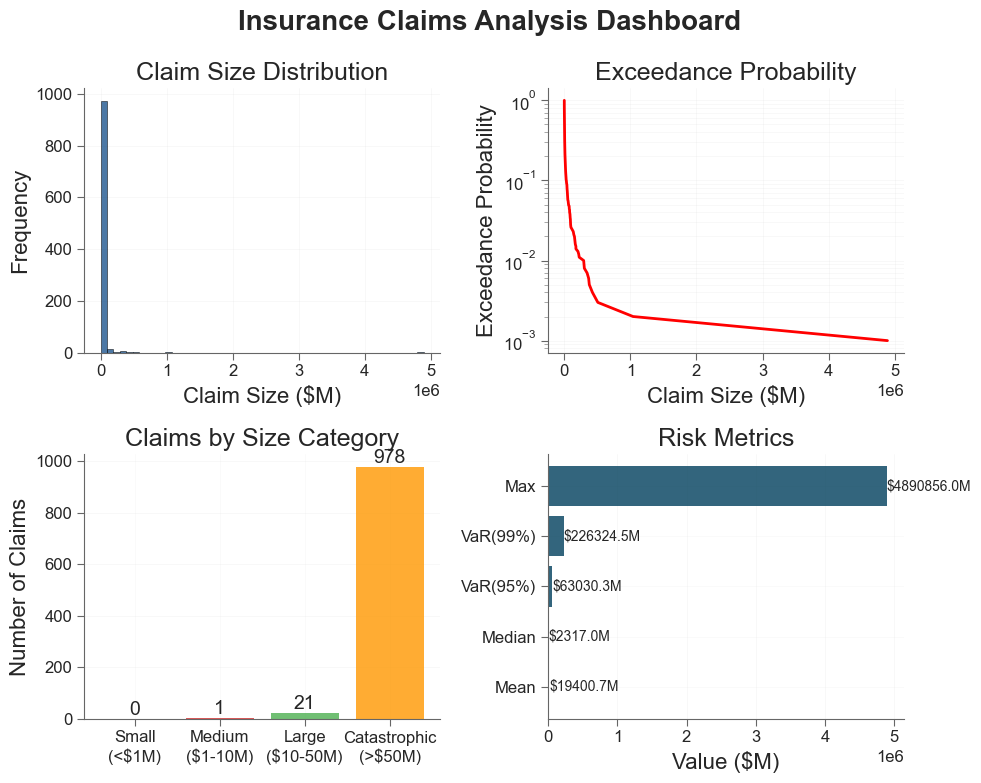


Risk Summary Statistics:
Mean        : $19,400.7M
Median      : $2,317.0M
VaR(95%)    : $63,030.3M
VaR(99%)    : $226,324.5M
Max         : $4,890,856.0M


In [5]:
# Generate sample insurance data
np.random.seed(42)
claim_sizes = np.random.lognormal(mean=10, sigma=2, size=1000)
claim_sizes = claim_sizes * 100000  # Scale to dollars

# Create factory with presentation theme (for executive reports)
factory = FigureFactory(theme=Theme.PRESENTATION)

# Create subplots for comprehensive analysis
fig, axes = factory.create_subplots(
    rows=2, cols=2,
    size_type="technical",  # Use technical appendix size
    title="Insurance Claims Analysis Dashboard",
    subplot_titles=[
        "Claim Size Distribution",
        "Exceedance Probability",
        "Claims by Size Category",
        "Risk Metrics"
    ]
)

# Plot 1: Histogram of claim sizes
ax1 = axes[0, 0]
ax1.hist(claim_sizes/1e6, bins=50, 
         color=factory.style_manager.get_colors().primary,
         alpha=0.7, edgecolor='black', linewidth=0.5)
ax1.set_xlabel('Claim Size ($M)')
ax1.set_ylabel('Frequency')
ax1.grid(True, alpha=0.3)

# Plot 2: Exceedance curve
ax2 = axes[0, 1]
sorted_claims = np.sort(claim_sizes)[::-1]
exceedance_prob = np.arange(1, len(sorted_claims) + 1) / len(sorted_claims)
ax2.semilogy(sorted_claims/1e6, exceedance_prob,
             color=factory.style_manager.get_colors().warning,
             linewidth=2)
ax2.set_xlabel('Claim Size ($M)')
ax2.set_ylabel('Exceedance Probability')
ax2.grid(True, alpha=0.3, which='both')

# Plot 3: Bar chart of claim categories
ax3 = axes[1, 0]
categories = ['Small\n(<$1M)', 'Medium\n($1-10M)', 'Large\n($10-50M)', 'Catastrophic\n(>$50M)']
counts = [
    np.sum(claim_sizes < 1e6),
    np.sum((claim_sizes >= 1e6) & (claim_sizes < 10e6)),
    np.sum((claim_sizes >= 10e6) & (claim_sizes < 50e6)),
    np.sum(claim_sizes >= 50e6)
]
colors_list = factory.style_manager.get_colors().series[:4]
bars = ax3.bar(categories, counts, color=colors_list, alpha=0.8)
ax3.set_ylabel('Number of Claims')
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(count)}',
             ha='center', va='bottom')

# Plot 4: Risk metrics
ax4 = axes[1, 1]
metrics = {
    'Mean': np.mean(claim_sizes)/1e6,
    'Median': np.median(claim_sizes)/1e6,
    'VaR(95%)': np.percentile(claim_sizes, 95)/1e6,
    'VaR(99%)': np.percentile(claim_sizes, 99)/1e6,
    'Max': np.max(claim_sizes)/1e6
}

y_pos = np.arange(len(metrics))
values = list(metrics.values())
labels = list(metrics.keys())

bars = ax4.barh(y_pos, values, 
                color=factory.style_manager.get_colors().secondary,
                alpha=0.8)
ax4.set_yticks(y_pos)
ax4.set_yticklabels(labels)
ax4.set_xlabel('Value ($M)')
ax4.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (bar, val) in enumerate(zip(bars, values)):
    ax4.text(val, bar.get_y() + bar.get_height()/2.,
             f'${val:.1f}M',
             ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\nRisk Summary Statistics:")
print("="*40)
for metric, value in metrics.items():
    print(f"{metric:12s}: ${value:,.1f}M")

## 5. Colorblind-Friendly Visualization

Demonstrate the colorblind-friendly theme for accessibility.

C:\Users\alexf\AppData\Local\Temp\ipykernel_14672\915552406.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range('2023-01', periods=12, freq='M')


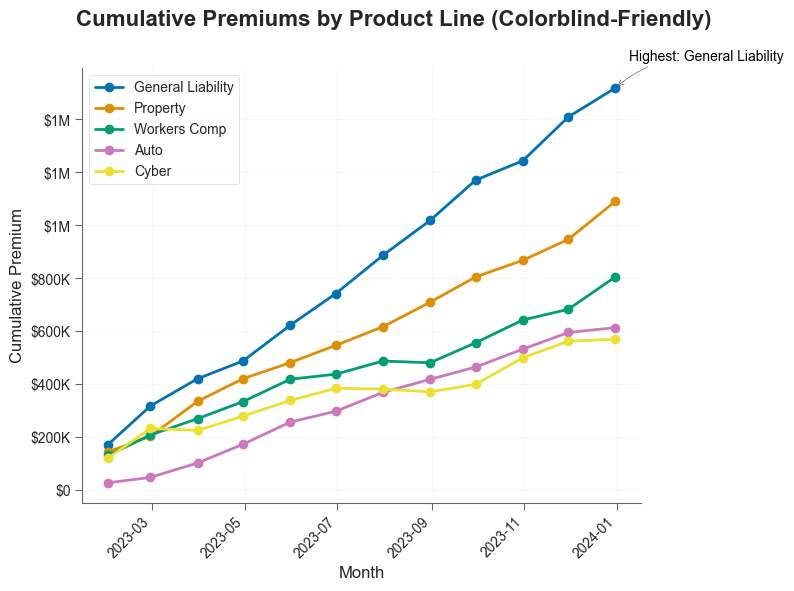


Colorblind-Friendly Palette:
Series 1: #0173B2
Series 2: #DE8F05
Series 3: #029E73
Series 4: #CC78BC
Series 5: #ECE133


In [6]:
# Create factory with colorblind theme
factory = FigureFactory(theme=Theme.COLORBLIND)

# Generate time series data for multiple insurance products
months = pd.date_range('2023-01', periods=12, freq='M')
products = {
    'General Liability': np.cumsum(np.random.randn(12) * 0.5 + 1.0) * 100000,
    'Property': np.cumsum(np.random.randn(12) * 0.3 + 0.8) * 100000,
    'Workers Comp': np.cumsum(np.random.randn(12) * 0.4 + 0.6) * 100000,
    'Auto': np.cumsum(np.random.randn(12) * 0.2 + 0.5) * 100000,
    'Cyber': np.cumsum(np.random.randn(12) * 0.6 + 0.3) * 100000
}

# Create line plot with multiple series
fig, ax = factory.create_line_plot(
    x_data=months,
    y_data=products,
    title="Cumulative Premiums by Product Line (Colorblind-Friendly)",
    x_label="Month",
    y_label="Cumulative Premium",
    size_type="blog",
    show_legend=True,
    markers=True
)

# Format y-axis as currency
factory.format_axis_currency(ax, axis="y", abbreviate=True)

# Rotate x-axis labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Add annotation for highest premium product
highest_product = max(products.items(), key=lambda x: x[1][-1])
factory.add_annotations(
    ax, months[-1], highest_product[1][-1],
    f"Highest: {highest_product[0]}",
    arrow=True, offset=(10, 20)
)

plt.tight_layout()
plt.show()

# Show color palette
colors = factory.style_manager.get_colors()
print("\nColorblind-Friendly Palette:")
print("="*40)
for i, color in enumerate(colors.series[:5]):
    print(f"Series {i+1}: {color}")

## 6. Print-Ready Report Generation

Create high-quality figures suitable for print reports.

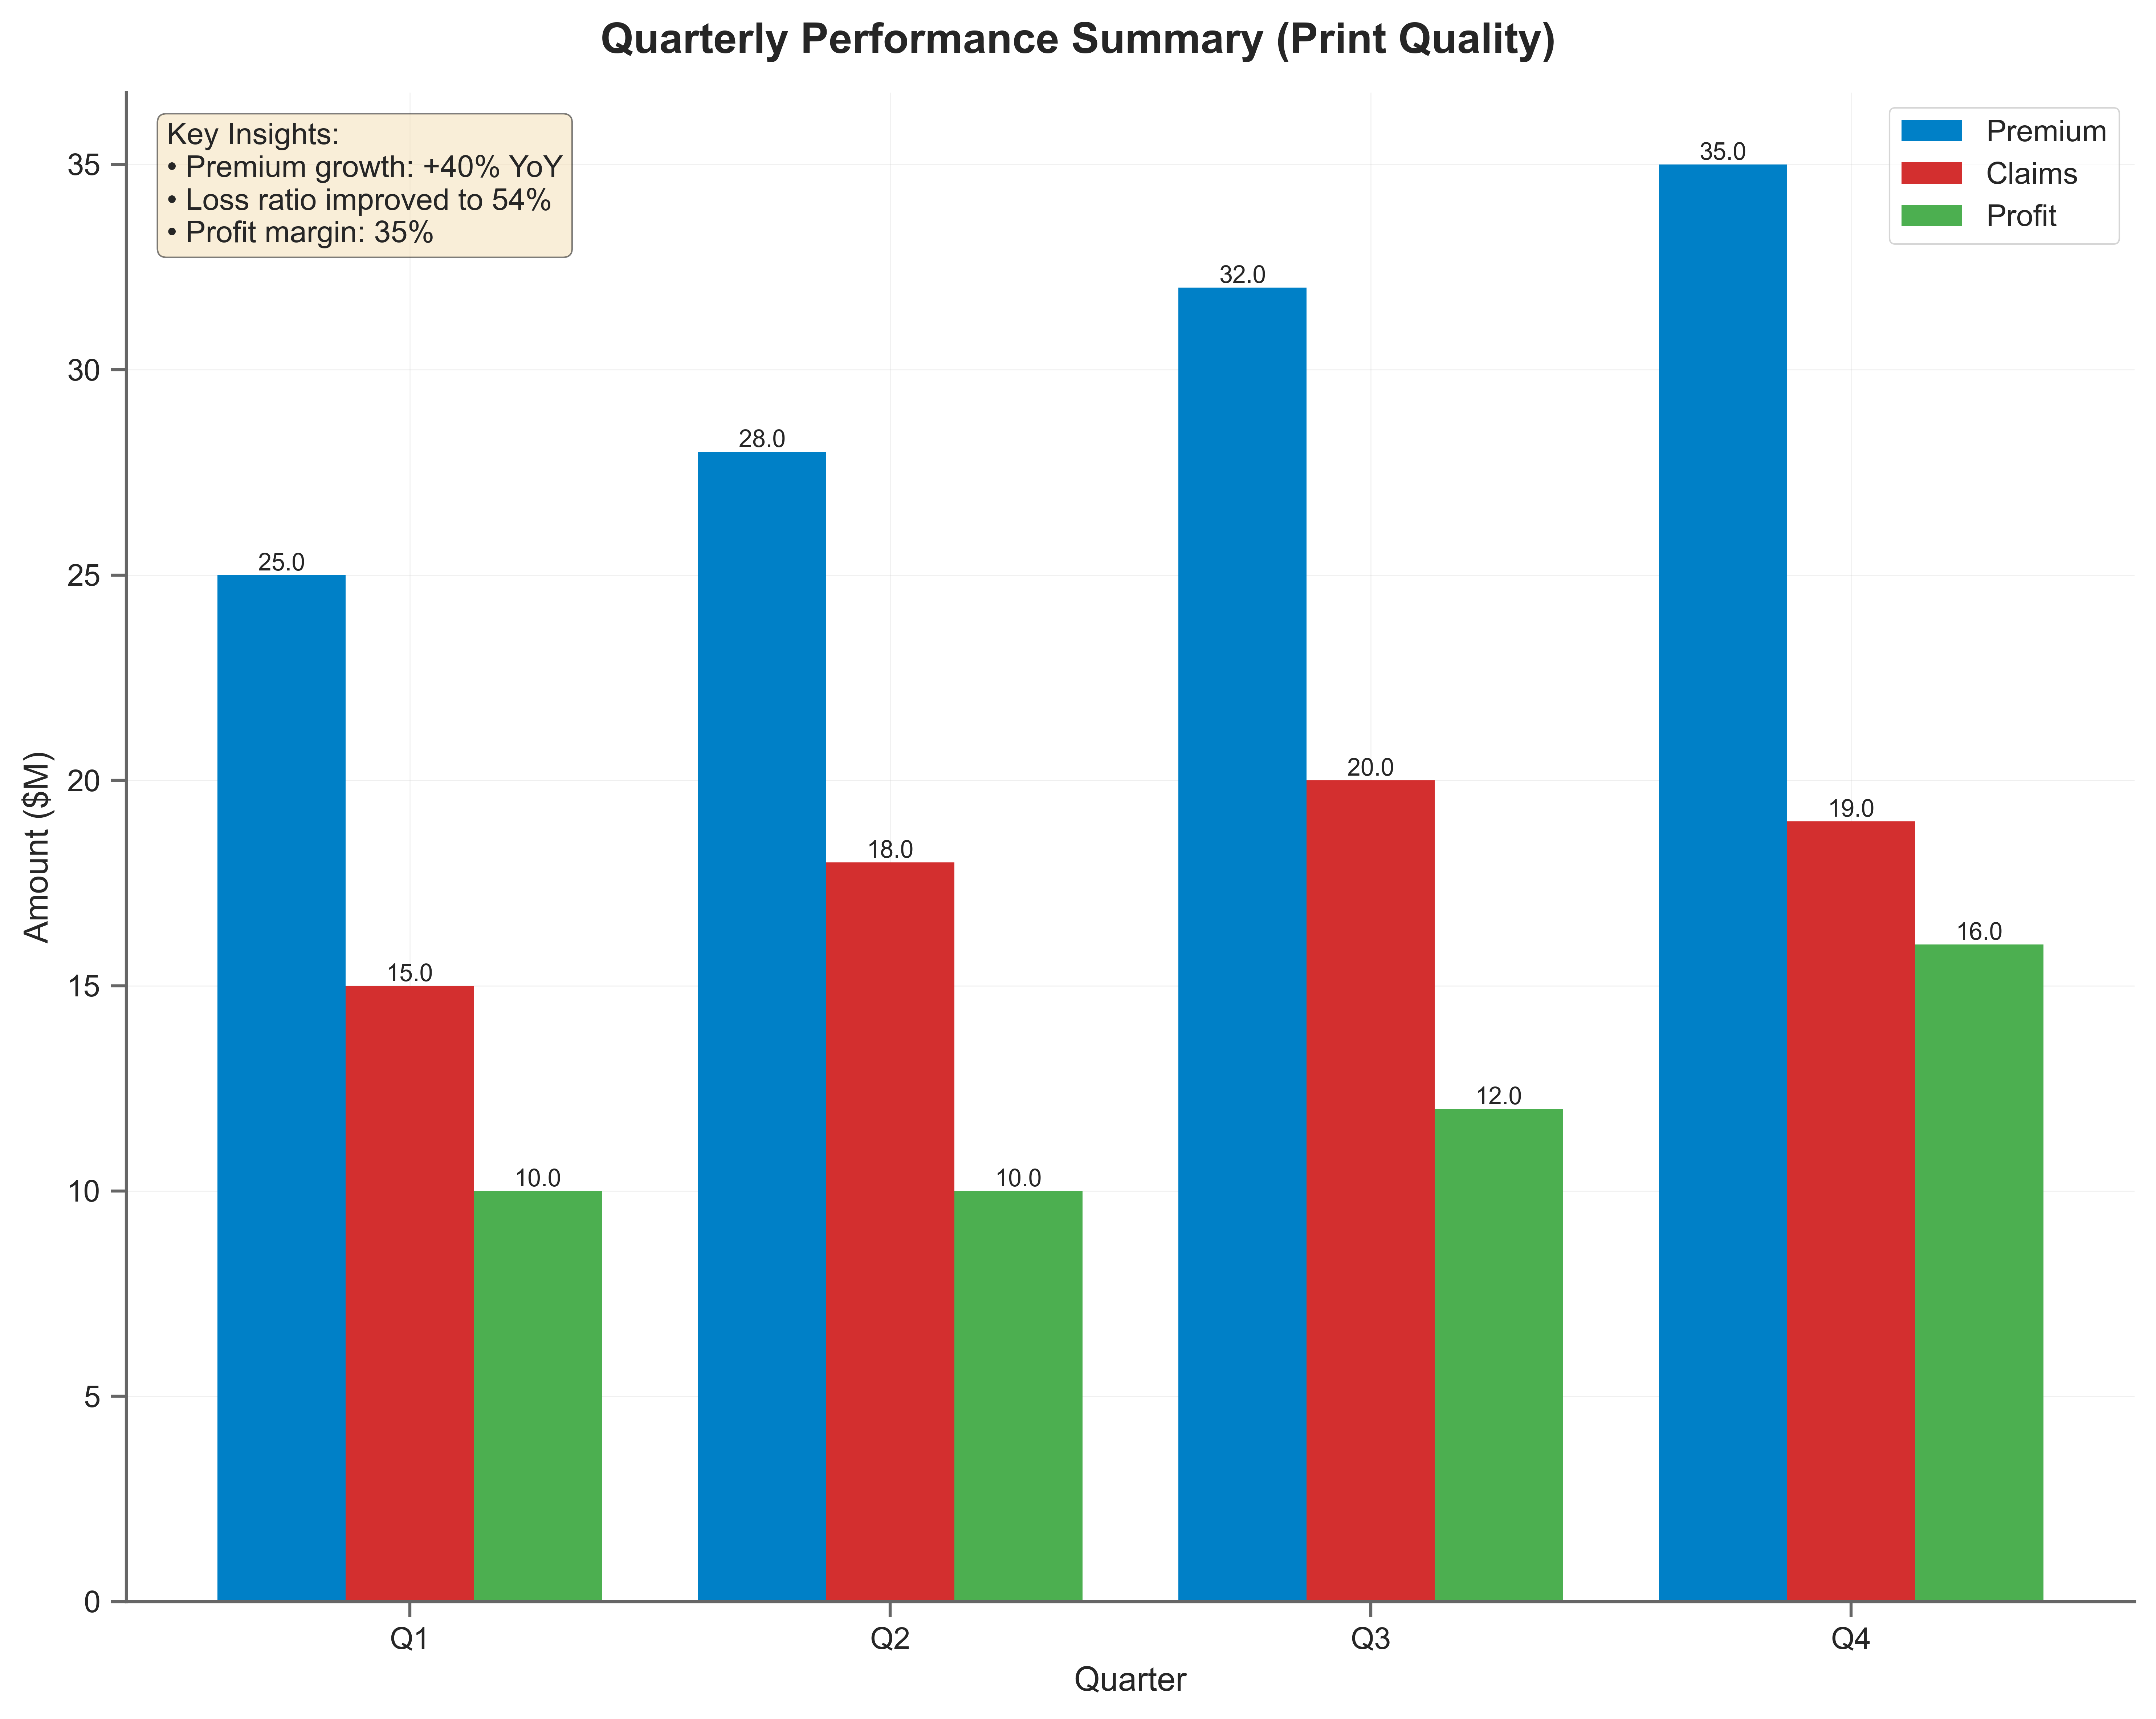


Figure saved to quarterly_report_print.png with print quality (300 DPI)


In [7]:
# Create factory with print theme (high DPI, optimized for printing)
factory = FigureFactory(theme=Theme.PRINT)

# Generate data for executive summary
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
metrics_data = {
    'Premium': [25, 28, 32, 35],
    'Claims': [15, 18, 20, 19],
    'Profit': [10, 10, 12, 16]
}

# Create bar plot comparison
fig, ax = factory.create_bar_plot(
    categories=quarters,
    values=metrics_data,
    title="Quarterly Performance Summary (Print Quality)",
    x_label="Quarter",
    y_label="Amount ($M)",
    size_type="technical",
    dpi_type="print",  # Use print DPI (300)
    show_values=True
)

# Add a text box with key insights
textstr = '\n'.join([
    'Key Insights:',
    '• Premium growth: +40% YoY',
    '• Loss ratio improved to 54%',
    '• Profit margin: 35%'
])

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.tight_layout()

# Save high-quality figure for print
output_path = 'quarterly_report_print.png'
factory.save_figure(fig, output_path, output_type="print")

plt.show()
print(f"\nFigure saved to {output_path} with print quality (300 DPI)")

## 7. Advanced Features: Custom Configuration

Demonstrate how to customize themes and save/load configurations.

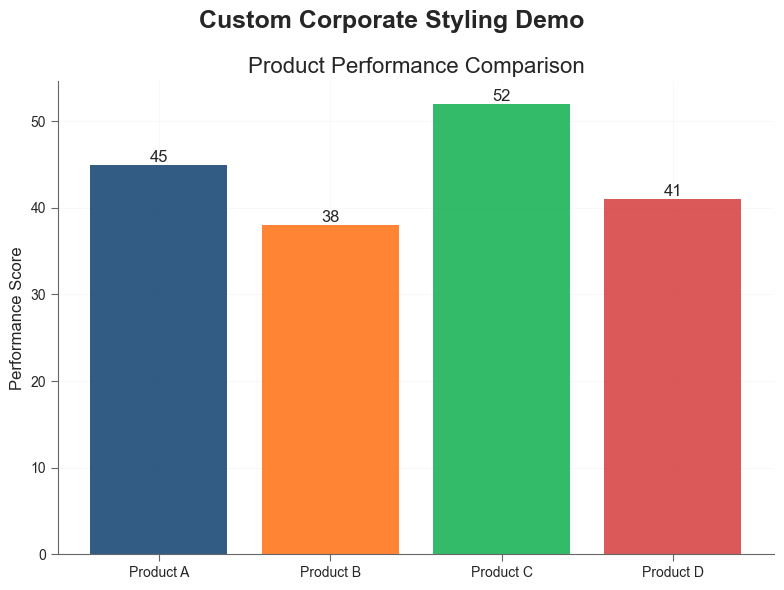


Custom configuration saved to custom_style_config.yaml

Loaded Custom Configuration:
Primary Color: #003366
Secondary Color: #FF6600
Accent Color: #00AA44


In [8]:
# Create a custom style manager
custom_style = StyleManager(theme=Theme.DEFAULT)

# Customize colors for corporate branding
custom_style.update_colors({
    "primary": "#003366",      # Corporate blue
    "secondary": "#FF6600",    # Corporate orange
    "accent": "#00AA44",       # Corporate green
})

# Customize fonts
custom_style.update_fonts({
    "family": "Helvetica",
    "size_base": 12,
    "size_title": 16
})

# Create factory with custom style
custom_factory = FigureFactory(style_manager=custom_style)

# Generate sample data
categories = ['Product A', 'Product B', 'Product C', 'Product D']
values = [45, 38, 52, 41]

# Create plot with custom styling
fig, ax = custom_factory.create_figure(
    size_type="blog",
    title="Custom Corporate Styling Demo"
)

# Create custom visualization
colors_custom = custom_style.get_colors()
bars = ax.bar(categories, values, 
              color=[colors_custom.primary, colors_custom.secondary, 
                     colors_custom.accent, colors_custom.warning],
              alpha=0.8)

ax.set_ylabel('Performance Score')
ax.set_title('Product Performance Comparison')
ax.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height}',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Save custom configuration
config_path = 'custom_style_config.yaml'
custom_style.save_config(config_path)
print(f"\nCustom configuration saved to {config_path}")

# Demonstrate loading configuration
loaded_style = StyleManager()
loaded_style.load_config(config_path)
loaded_colors = loaded_style.get_colors()

print("\nLoaded Custom Configuration:")
print("="*40)
print(f"Primary Color: {loaded_colors.primary}")
print(f"Secondary Color: {loaded_colors.secondary}")
print(f"Accent Color: {loaded_colors.accent}")

## 8. Integration with Existing Visualization Module

Show how the factory integrates with the existing visualization functions.

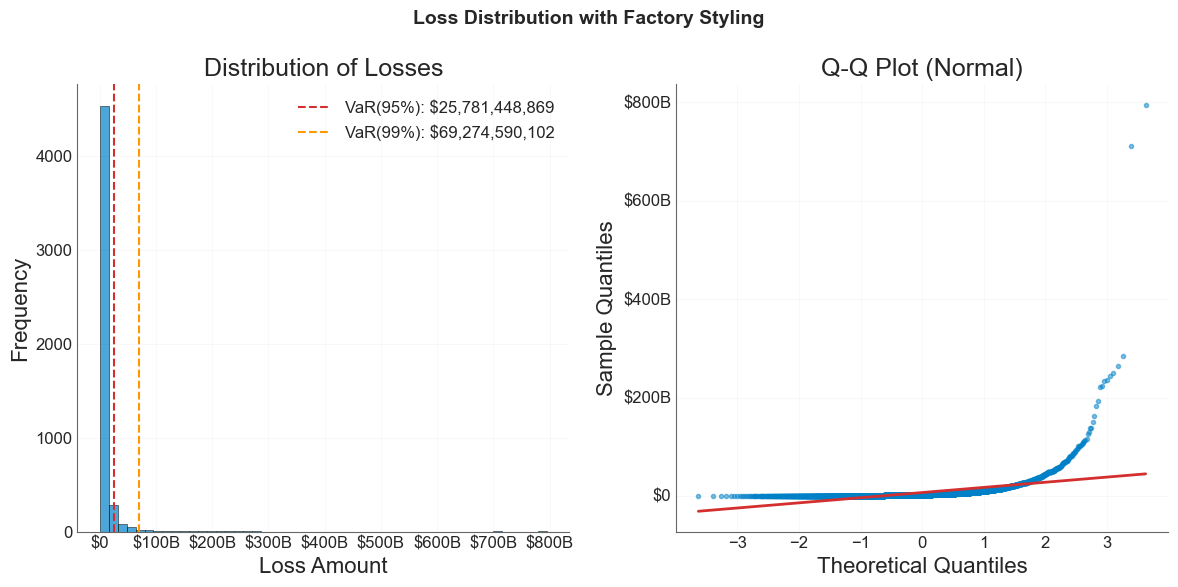

c:\Users\alexf\OneDrive\Documents\Projects\Ergodic Insurance Limits\ergodic_insurance\src\visualization_infra\figure_factory.py:757: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(


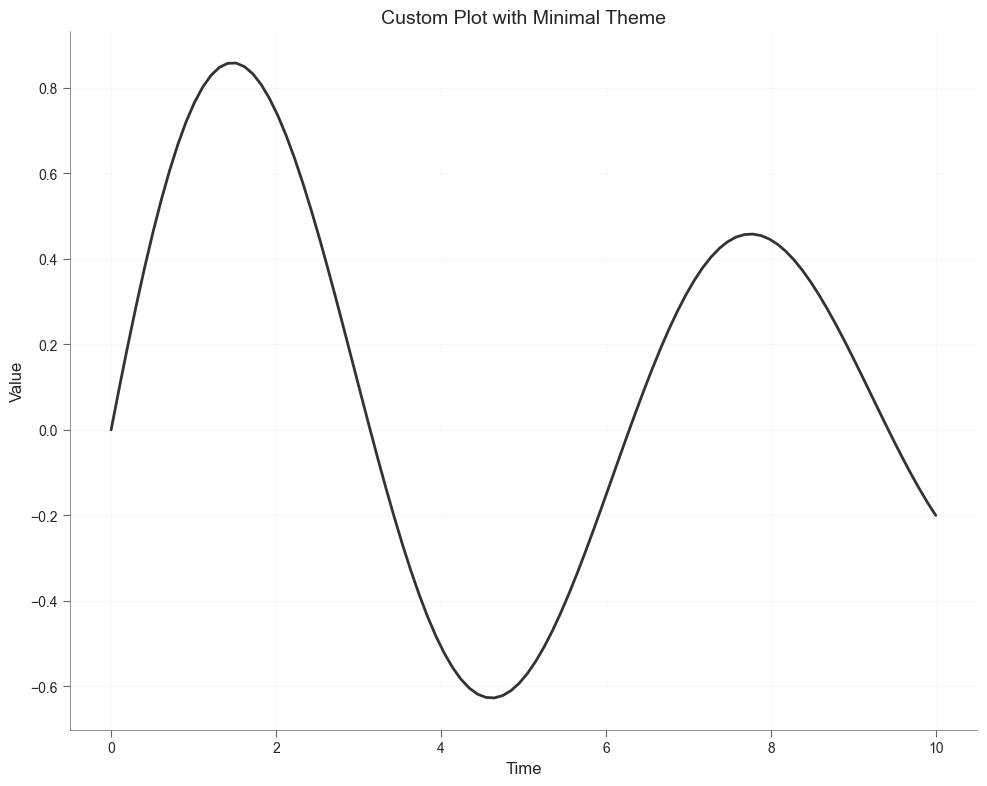


Factory integration with existing visualization module successful!


In [9]:
# Import existing visualization module
from src import visualization as viz

# Generate sample loss data
np.random.seed(42)
losses = np.random.lognormal(mean=10, sigma=1.5, size=5000) * 100000

# Use existing plot function with factory support
fig = viz.plot_loss_distribution(
    losses=losses,
    title="Loss Distribution with Factory Styling",
    bins=50,
    show_metrics=True,
    var_levels=[0.95, 0.99],
    use_factory=True,  # Enable factory-based styling
    theme=Theme.PRESENTATION  # Use presentation theme
)

plt.show()

# Create a styled figure using the helper function
fig, ax = viz.create_styled_figure(
    size_type="technical",
    theme=Theme.MINIMAL,
    use_factory=True
)

# Add custom content
x = np.linspace(0, 10, 100)
y = np.sin(x) * np.exp(-x/10)
ax.plot(x, y, linewidth=2)
ax.set_title("Custom Plot with Minimal Theme")
ax.set_xlabel("Time")
ax.set_ylabel("Value")

plt.tight_layout()
plt.show()

print("\nFactory integration with existing visualization module successful!")

## Summary

This notebook demonstrated the new visualization factory infrastructure:

### Key Features:
1. **StyleManager**: Centralized theme and style management
2. **FigureFactory**: Standardized plot creation with automatic styling
3. **Multiple Themes**: DEFAULT, COLORBLIND, PRESENTATION, MINIMAL, PRINT
4. **Consistent Styling**: Colors, fonts, sizes, and DPI settings
5. **Easy Customization**: Update colors, fonts, and save configurations
6. **Backward Compatible**: Integrates with existing visualization functions

### Benefits:
- **Consistency**: All plots follow the same style guidelines
- **Flexibility**: Easy theme switching for different audiences
- **Accessibility**: Built-in colorblind-friendly options
- **Quality**: Optimized settings for web and print output
- **Efficiency**: Reduced code duplication and easier maintenance

### Usage Pattern:
```python
# Quick start
factory = FigureFactory(theme=Theme.PRESENTATION)
fig, ax = factory.create_line_plot(x_data, y_data, title="My Plot")

# Custom configuration
style_mgr = StyleManager()
style_mgr.update_colors({"primary": "#custom_color"})
factory = FigureFactory(style_manager=style_mgr)
```